# Machine Exercise 3
 $ \textit{by Mark Jeremy G. Narag | PhD Physics student | 2014-64423}$

Plot the histogram of 1000 electrons with velocities generated from the Maxwell-Juttner distribution, and compare the histogram with respect to the Maxwell-Boltzmann distribution. Do this for temperatures of 50 keV, 500 keV and 5 MeV.

**NOTE:** *Don't forget to convert keV to Joules. Also, the given values is the $k_bT$ already where $k_b$ is the Boltzmann constant.*


_________________________________________________________________________________________________________________
Majority of the codes here are from Dr. Zosa's sample programs. I would like to also acknowledge my gorgeous, soon-to-be-doctor, friend Joy Kristelle De Mata for guiding me in this activity! 

## The Maxwell Juttner Distribution

Below is the code provided by Dr. Zosa  which calculates the quantile function of the Maxwell-Juttner distribution

The function `MJ` is the  Maxwell-Juttner distribution.
The function `F` is the  CDF. 
The function `speed_gen` generate a random value of speed

In [1]:
import numpy as np
from scipy.special import kn #import the modified Bessel function
from scipy.integrate import quad # import the function used to integrate
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
def MJ(g,theta): #define the maxwell Jutnner Distribution
    b = np.sqrt(1-1/g**2) # calculate beta
    return g**2*b/(theta*kn(2,1/theta))*np.exp(-g/theta)
def F(g,theta): #define the CDF
    f = lambda x: MJ(x,theta)
    return quad(f,1,g)[0]
def speed_gen(theta): #generate a random g from a MJ distribution
    c = 3e8 #speed of light (change this according to the units you want)
    u = np.random.random() #generate a random number from 0 to 1
    f = lambda x: (F(x,theta) - u)**2 #calculate the error between u and a guess F(x,theta)
    # print(u,f(1),f(1.1))
    g = minimize_scalar(f).x #minimize the function f to find the value of x which makes sure F(x,theta) is as close to u as possible.
    return c * np.sqrt(1-1/g**2)

Let's define a function `gen_sphere` that picks 3 random point on the surface of the sphere. These values are normalized such that they have a unit length

We can make the speed as velocity by assigning it direction. We define `velocity_gen` where we multiply the speed by the random vector from the surface of a unit sphere using `gen_sphere` .

In [2]:
def gen_sphere():
    u = np.random.normal(0,1,3) #3 random number
    return u / np.linalg.norm(u) 
def velocity_gen(theta):
    return speed_gen(theta)*gen_sphere()

Now, let's plot the histogram of 1000 electrons

/var/folders/jy/04tql0zn0r5gxkthn6r5ss4h0000gn/T/ipykernel_4395/1461635971.py:7: RuntimeWarning: invalid value encountered in sqrt
  b = np.sqrt(1-1/g**2) # calculate beta
/var/folders/jy/04tql0zn0r5gxkthn6r5ss4h0000gn/T/ipykernel_4395/1461635971.py:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(f,1,g)[0]
/var/folders/jy/04tql0zn0r5gxkthn6r5ss4h0000gn/T/ipykernel_4395/1461635971.py:18: RuntimeWarning: invalid value encountered in sqrt
  return c * np.sqrt(1-1/g**2)


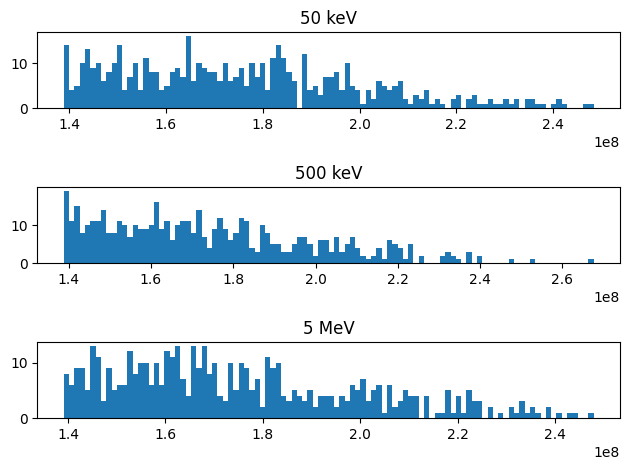

In [3]:
N = 1000
Va = np.zeros(N)
Vb = np.zeros(N)
Vc = np.zeros(N)

kbT1 = 8.0108828e-15#50keV in Joules
kbT2 = 8.0108828e-14#500keV in Joules
kbT3 = 8.0108828e-13 #5MeV in Joules

k=1.3806452e-23 #boltzmann constant
m = 9.10938e-31 #kg
c = 3e8 #m/s

THETA1 = (kbT1) / (m*c*c) 
THETA2 = (kbT2) / (m*c*c)
THETA3 = (kbT3) / (m*c*c)


for i in range(0,N):
    Va[i] = np.linalg.norm(velocity_gen(THETA1))
    Vb[i] = np.linalg.norm(velocity_gen(THETA1))
    Vc[i] = np.linalg.norm(velocity_gen(THETA1))
    
fig, ((ax0, ax1, ax2)) = plt.subplots(nrows=3, ncols=1)

ax0.hist(Va, 100)
ax0.set_title('50 keV')
ax1.hist(Vb, 100)
ax1.set_title('500 keV')
ax2.hist(Vc, 100)
ax2.set_title('5 MeV')
fig.tight_layout()
plt.show()


## Maxwell Boltzmann distribution

In [4]:
import numpy as np
from scipy.integrate import quad # import the function used to integrate
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

m = 9.10938e-31 # kg

def MB(v,kbT): #define the maxwell boltzmann Distribution
    return (m/(2*np.pi*kbT))**1.5*np.exp(-m*v**2/2*kbT)

def Fmb(v,kbT): #define the CDF
    f = lambda x: MB(x,kbT)
    return quad(f,1,v)[0]

def speedgen(kbT): #generate a random v from a MB distribution
    u = np.random.random() #generate a random number from 0 to 1
    f = lambda x: (F(x,kbT) - u)**2 #calculate the error 
    v = minimize_scalar(f).x
    return v

def gensphere():
    u = np.random.normal(0,1,3)
    return u / np.linalg.norm(u)

def velgen(kbT):
    return speedgen(kbT)*gensphere()

/var/folders/jy/04tql0zn0r5gxkthn6r5ss4h0000gn/T/ipykernel_4395/1461635971.py:7: RuntimeWarning: invalid value encountered in sqrt
  b = np.sqrt(1-1/g**2) # calculate beta
/var/folders/jy/04tql0zn0r5gxkthn6r5ss4h0000gn/T/ipykernel_4395/1461635971.py:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(f,1,g)[0]


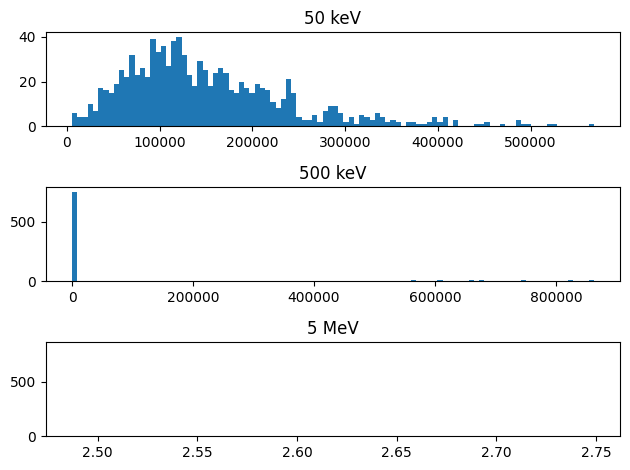

In [5]:
N = 1000
Vmb_a = np.zeros(N)
Vmb_b = np.zeros(N)
Vmb_c = np.zeros(N)


for i in range(0,N):
    Vmb_a[i] = np.linalg.norm(velgen(5e4))
    Vmb_b[i] = np.linalg.norm(velgen(5e5))
    Vmb_c[i] = np.linalg.norm(velgen(5e6))


    
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=3, ncols=1)

ax1.hist(Vmb_a, 100)
ax1.set_title('50 keV')

ax2.hist(Vmb_b, 100)
ax2.set_title('500 keV')

ax3.hist(Vmb_c, 100)
ax3.set_title('5 MeV')

fig.tight_layout()
plt.show()